# Lotka-Volterra inference cross-checks

In [2]:
import numpy as np
import corner
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from goldmine.inference.nde import MAFInference
from goldmine.simulators.lotka_volterra import LotkaVolterra

## r scatter plots

In [63]:
reference_path = '../../data/results/lotkavolterra/'
log_r_ref = np.median(np.array(
    [np.load(reference_path + 'scandal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_largealpha_trainingsamplesize_100000.npy').flatten()]
    + [np.load(reference_path + 'scandal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_largealpha_trainingsamplesize_100000_run{}.npy'.format(i)).flatten() for i in range(1,5)]
), axis=0)

log_r1 = np.load(reference_path + 'scandal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_1000.npy').flatten()
log_r2 = np.load(reference_path + 'scandal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_10000.npy').flatten()
log_r3 = np.load(reference_path + 'scandal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000.npy').flatten()

log_r_s1 = np.load(reference_path + 'rascal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_trainingsamplesize_1000.npy').flatten()
log_r_s2 = np.load(reference_path + 'rascal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_trainingsamplesize_10000.npy').flatten()
log_r_s3 = np.load(reference_path + 'rascal/log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_trainingsamplesize_100000.npy').flatten()


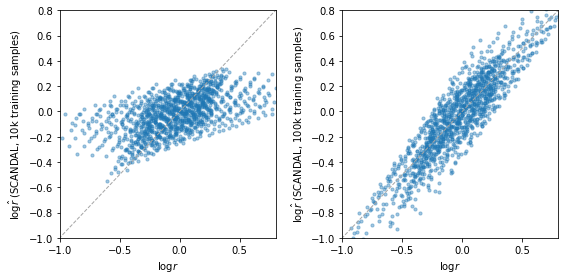

In [64]:
plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)

plt.plot([-2.,2.], [-2.,2.], lw=1., ls='--', c='0.65')
plt.scatter(log_r_ref[::500], log_r2[::500], s=10., alpha=0.4)

plt.ylabel('$\log \hat{r}$ (SCANDAL, 10k training samples)')
plt.xlabel('$\log {r}$')

plt.xlim(-1,.8)
plt.ylim(-1,.8)

ax = plt.subplot(1,2,2)

plt.plot([-2.,2.], [-2.,2.], lw=1., ls='--', c='0.65')
plt.scatter(log_r_ref[::500], log_r3[::500], s=10., alpha=0.4)

plt.ylabel('$\log \hat{r}$ (SCANDAL, 100k training samples)')
plt.xlabel('$\log {r}$')

plt.xlim(-1,.8)
plt.ylim(-1,.8)

plt.tight_layout()
plt.show()

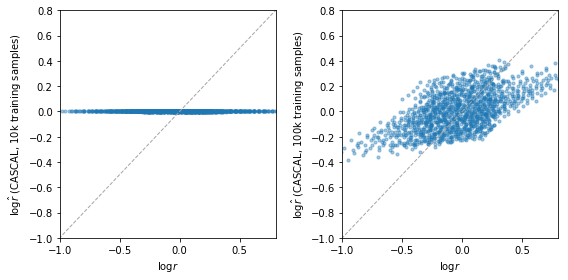

In [65]:
plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)

plt.plot([-2.,2.], [-2.,2.], lw=1., ls='--', c='0.65')
plt.scatter(log_r_ref[::500], log_r_s2[::500], s=10., alpha=0.4)

plt.ylabel('$\log \hat{r}$ (CASCAL, 10k training samples)')
plt.xlabel('$\log {r}$')

plt.xlim(-1,.8)
plt.ylim(-1,.8)

ax = plt.subplot(1,2,2)

plt.plot([-2.,2.], [-2.,2.], lw=1., ls='--', c='0.65')
plt.scatter(log_r_ref[::500], log_r_s3[::500], s=10., alpha=0.4)

plt.ylabel('$\log \hat{r}$ (CASCAL, 100k training samples)')
plt.xlabel('$\log {r}$')

plt.xlim(-1,.8)
plt.ylim(-1,.8)

plt.tight_layout()
plt.show()

## Cross check p vs r

In [98]:
reference_path = '../../data/results/lotkavolterra/scandal/'
log_p = np.load(reference_path + 'log_p_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000.npy')
log_r_check = log_p - log_p[312, :]
log_r = np.load(reference_path + 'log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000.npy')

log_r - log_r_check


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Look at reference likelihood

In [116]:
reference_path = '../../data/results/lotkavolterra/maf/'
likelihood = np.load(reference_path + 'log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000.npy')
theta_grid = np.load(reference_path + 'theta_grid.npy')
exp_nll = -2. * np.mean((likelihood), axis=1)


In [117]:
i_best = np.argmin( exp_nll )
theta_best = theta_grid[i_best]
theta_best

array([-4.62, -0.69, -0.01, -4.62])

In [118]:
delta_nll = exp_nll - np.min(exp_nll)
distances = np.linalg.norm(theta_grid - theta_best, axis=1)

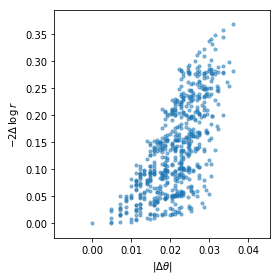

In [122]:
fig = plt.figure(figsize=(4,4))

plt.scatter(distances, delta_nll, alpha=0.5, s=10)

plt.xlabel(r'|$\Delta \theta$|')
plt.ylabel(r'$-2 \Delta \, \log \, r$')

plt.tight_layout()
plt.show()

In [129]:
grid_ = theta_grid.reshape(5,5,5,5,4)
nll_ = exp_nll.reshape(5,5,5,5)

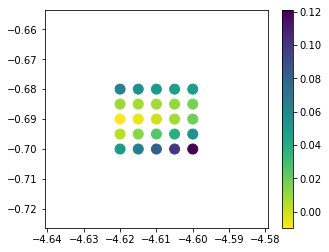

In [136]:
plt.figure(figsize=(5,4))

sc = plt.scatter(grid_[:,:,2,2,0].flatten(), grid_[:,:,2,2,1].flatten(), c=nll_[:,:,2,2].flatten(), cmap='viridis_r', s=100)

plt.colorbar(sc)

plt.show()

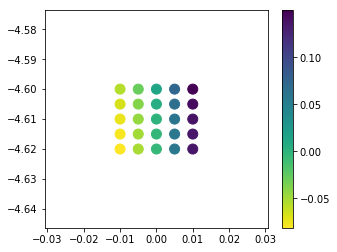

In [137]:
plt.figure(figsize=(5,4))

sc = plt.scatter(grid_[2,2,:,:,2].flatten(), grid_[2,2,:,:,3].flatten(), c=nll_[2,2,:,:].flatten(), cmap='viridis_r', s=100)

plt.colorbar(sc)

plt.show()

## Scatter plot between different runs

In [149]:
logp0 = np.load(reference_path + 'log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000.npy')
logp1 = np.load(reference_path + 'log_r_hat_test_zoom_singletheta_evaluated_on_grid__model_zoom_mog_trainingsamplesize_100000_run2.npy')


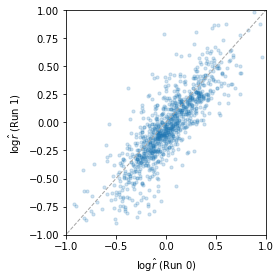

In [152]:
plt.figure(figsize=(4,4))

plt.plot([-2.,2.], [-2.,2.], lw=1., ls='--', c='0.65')
plt.scatter(logp0[::10000], logp1[::10000], s=10., alpha=0.2)

plt.xlabel('$\log \hat{r}$ (Run 0)')
plt.ylabel('$\log \hat{r}$ (Run 1)')

plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

plt.tight_layout()
plt.show()

## Original vs simulated samples

In [3]:
x_simulator = np.load('../../data/samples/lotkavolterra/x_test_zoom_singletheta.npy')[:1000]


In [4]:
inference = MAFInference(filename=
                         '../../data/models/lotkavolterra/maf/model_zoom_mog_trainingsamplesize_100000')

simulator = LotkaVolterra()

theta0 = simulator.theta_defaults(single_theta=True)[0][0]
theta0 = np.broadcast_to(theta0,(1000,4))

x_maf = inference.generate_samples(theta0)

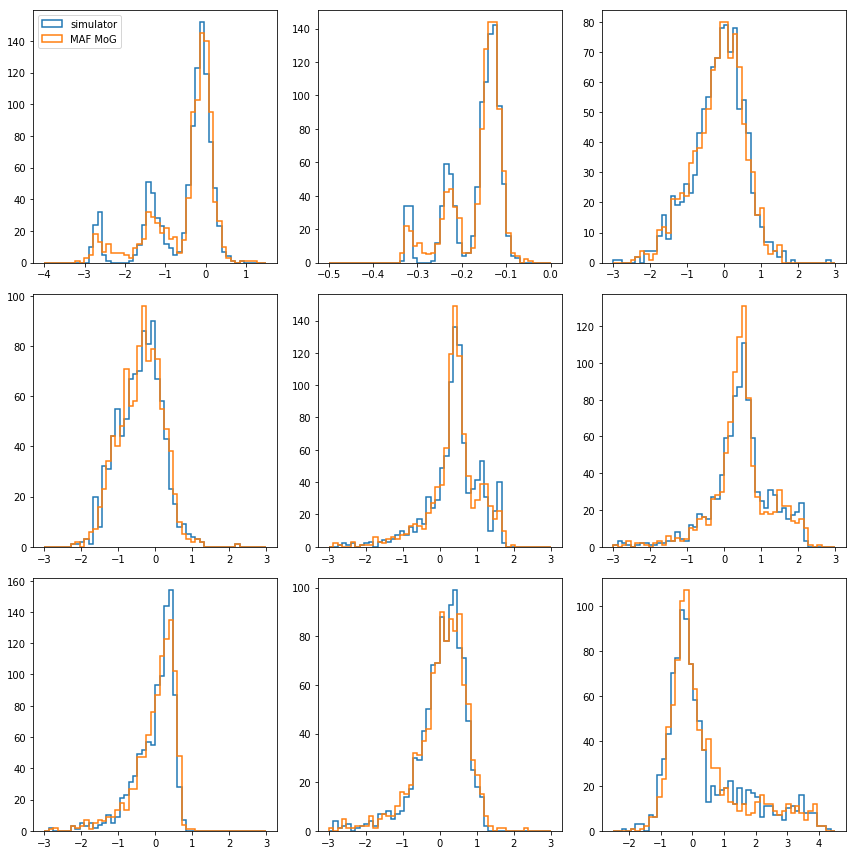

In [6]:
ranges = [(-3., 3.) for _ in range(9)]
ranges[0] = (-4.,1.5)
ranges[1] = (-0.5,0.)
ranges[8] = (-2.5,4.5)
bins = 50

plt.figure(figsize=(12,12))

for i in range(9):
    ax = plt.subplot(3,3,i+1)
       
    plt.hist(x_simulator[:,i], histtype='step', range=ranges[i], bins=bins, lw=1.5, label='simulator') 
    plt.hist(x_maf[:,i], histtype='step', range=ranges[i], bins=bins, lw=1.5, label='MAF MoG') 
    
    if i == 0:
        plt.legend(loc='upper left')
    
plt.tight_layout()
plt.savefig('x_distribution.pdf')

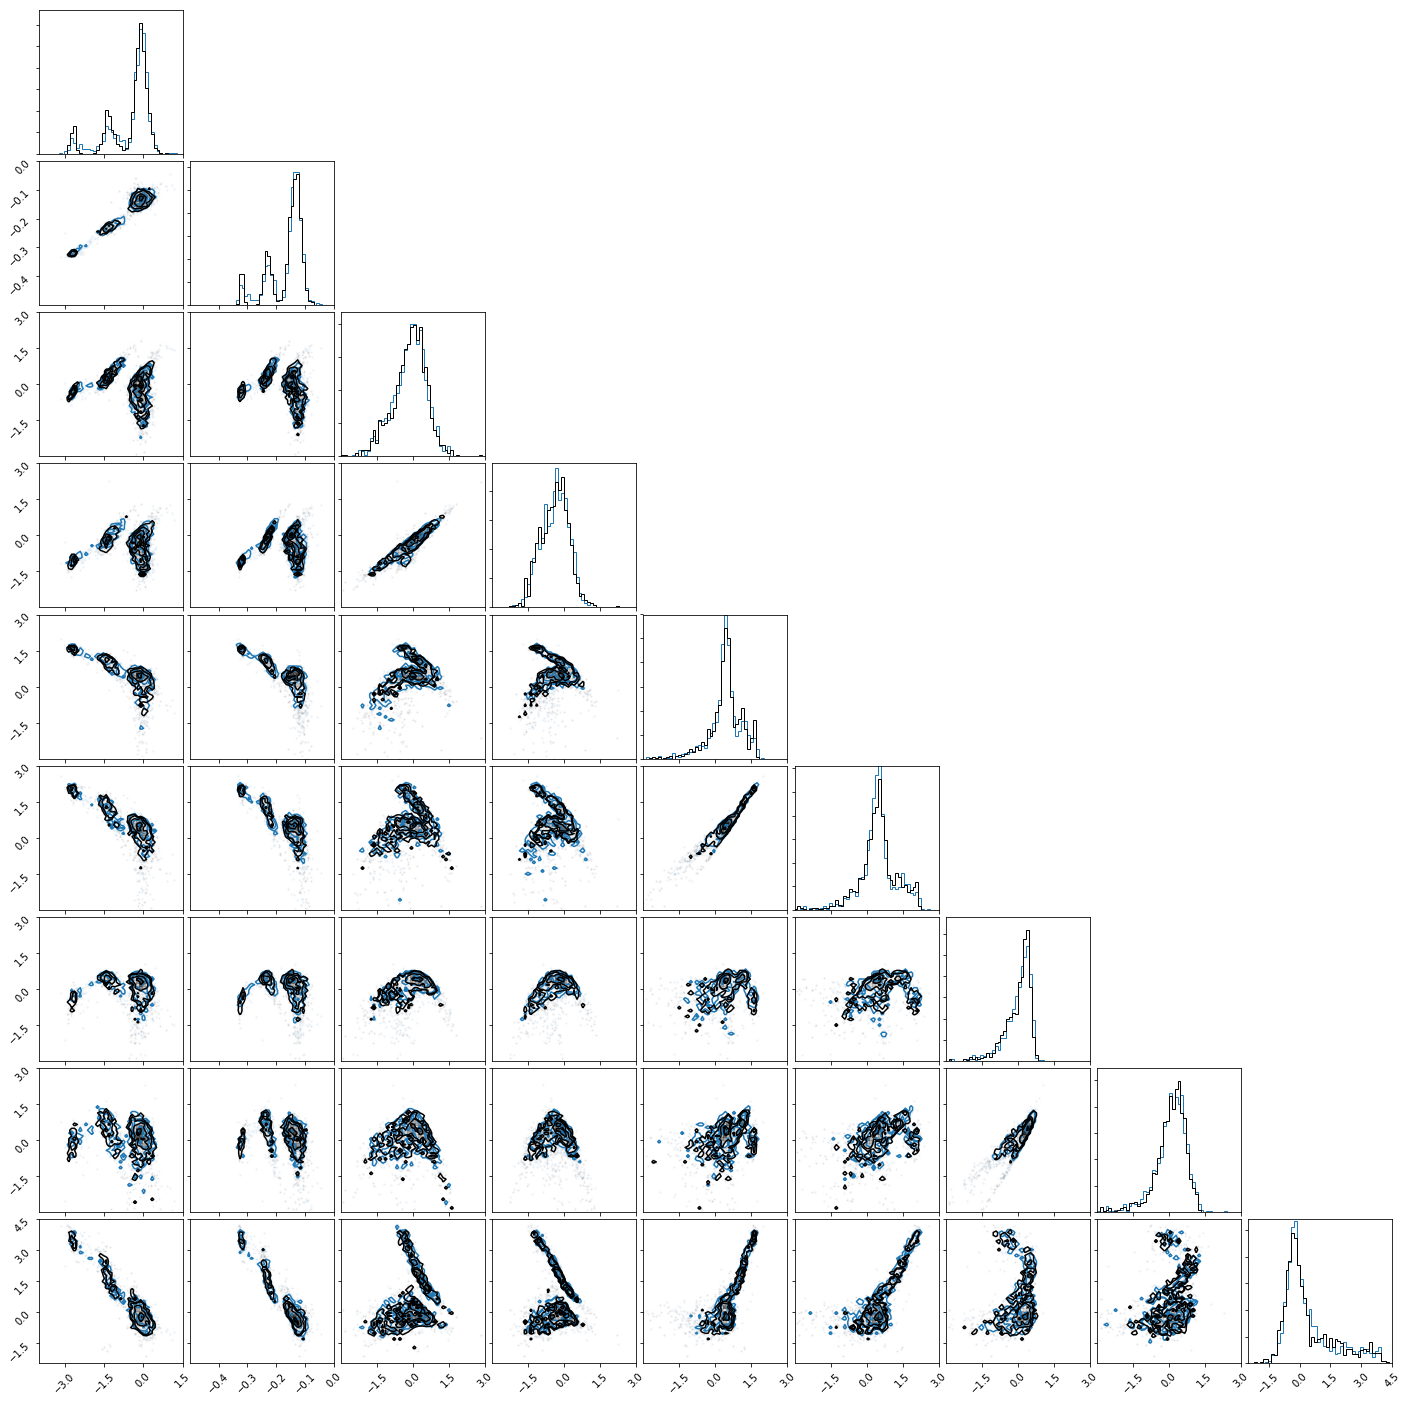

In [7]:
fig = corner.corner(x_maf[::],
                   range=ranges,
                   bins=[50 for _ in range(9)],
                   color='C0', alpha=0.5)
_ = corner.corner(x_simulator[::],
                   fig=fig,
                   range=ranges,
                   bins=[50 for _ in range(9)],
                   color='black', alpha=0.5)

plt.savefig('corner.pdf')